In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def conv2d_stride(input_matrix, kernel_matrix, stride):
  input_rows, input_cols = input_matrix.shape
  kernel_rows, kernel_cols = kernel_matrix.shape
  output_rows = int((input_rows - kernel_rows)/stride + 1)
  output_cols = int((input_cols - kernel_cols)/stride + 1)
  output = np.zeros((output_rows, output_cols))
  for i in range(output_rows):
    for j in range(output_cols):
      output[i, j] = np.sum(input_matrix[i*stride:i*stride+kernel_rows, j*stride:j*stride+kernel_cols] * kernel_matrix)
  return output

# Example usage:
input_matrix = np.array([[1,0,1,1,0], [0,0,0,1,1], [1,0,0,0,1],[0,1,1,1,0],[1,1,0,1,0]])
kernel_matrix = np.array([[1,0,0], [0,0,1],[1,1,0]])

output_matrix_stride1 = conv2d_stride(input_matrix, kernel_matrix, 1)
output_matrix_stride2 = conv2d_stride(input_matrix, kernel_matrix, 2)

print("Stride 1:")
print(output_matrix_stride1)
print("\nStride 2:")
print(output_matrix_stride2)

Stride 1:
[[2. 1. 2.]
 [1. 2. 3.]
 [4. 2. 1.]]

Stride 2:
[[2. 2.]
 [4. 1.]]


In [4]:
def max_pooling(input_matrix, pool_size):

  input_rows, input_cols = input_matrix.shape
  output_rows = int(input_rows / pool_size)
  output_cols = int(input_cols / pool_size)
  output = np.zeros((output_rows, output_cols))
  for i in range(output_rows):
    for j in range(output_cols):
      output[i, j] = np.max(input_matrix[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size])
  return output

def avg_pooling(input_matrix, pool_size):

  input_rows, input_cols = input_matrix.shape
  output_rows = int(input_rows / pool_size)
  output_cols = int(input_cols / pool_size)
  output = np.zeros((output_rows, output_cols))
  for i in range(output_rows):
    for j in range(output_cols):
      output[i, j] = np.mean(input_matrix[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size])
  return output

def sum_pooling(input_matrix, pool_size):


  input_rows, input_cols = input_matrix.shape
  output_rows = int(input_rows / pool_size)
  output_cols = int(input_cols / pool_size)
  output = np.zeros((output_rows, output_cols))
  for i in range(output_rows):
    for j in range(output_cols):
      output[i, j] = np.sum(input_matrix[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size])
  return output


pool_size = 1

# Max pooling
max_pooled_stride1 = max_pooling(output_matrix_stride1, pool_size)
max_pooled_stride2 = max_pooling(output_matrix_stride2, pool_size)

# Average pooling
avg_pooled_stride1 = avg_pooling(output_matrix_stride1, pool_size)
avg_pooled_stride2 = avg_pooling(output_matrix_stride2, pool_size)

# Sum pooling
sum_pooled_stride1 = sum_pooling(output_matrix_stride1, pool_size)
sum_pooled_stride2 = sum_pooling(output_matrix_stride2, pool_size)

print("Max pooling:")
print("Stride 1:")
print(max_pooled_stride1)
print("Stride 2:")
print(max_pooled_stride2)
print("\nAverage pooling:")
print("Stride 1:")
print(avg_pooled_stride1)
print("Stride 2:")
print(avg_pooled_stride2)
print("\nSum pooling:")
print("Stride 1:")
print(sum_pooled_stride1)
print("Stride 2:")
print(sum_pooled_stride2)

Max pooling:
Stride 1:
[[2. 1. 2.]
 [1. 2. 3.]
 [4. 2. 1.]]
Stride 2:
[[2. 2.]
 [4. 1.]]

Average pooling:
Stride 1:
[[2. 1. 2.]
 [1. 2. 3.]
 [4. 2. 1.]]
Stride 2:
[[2. 2.]
 [4. 1.]]

Sum pooling:
Stride 1:
[[2. 1. 2.]
 [1. 2. 3.]
 [4. 2. 1.]]
Stride 2:
[[2. 2.]
 [4. 1.]]


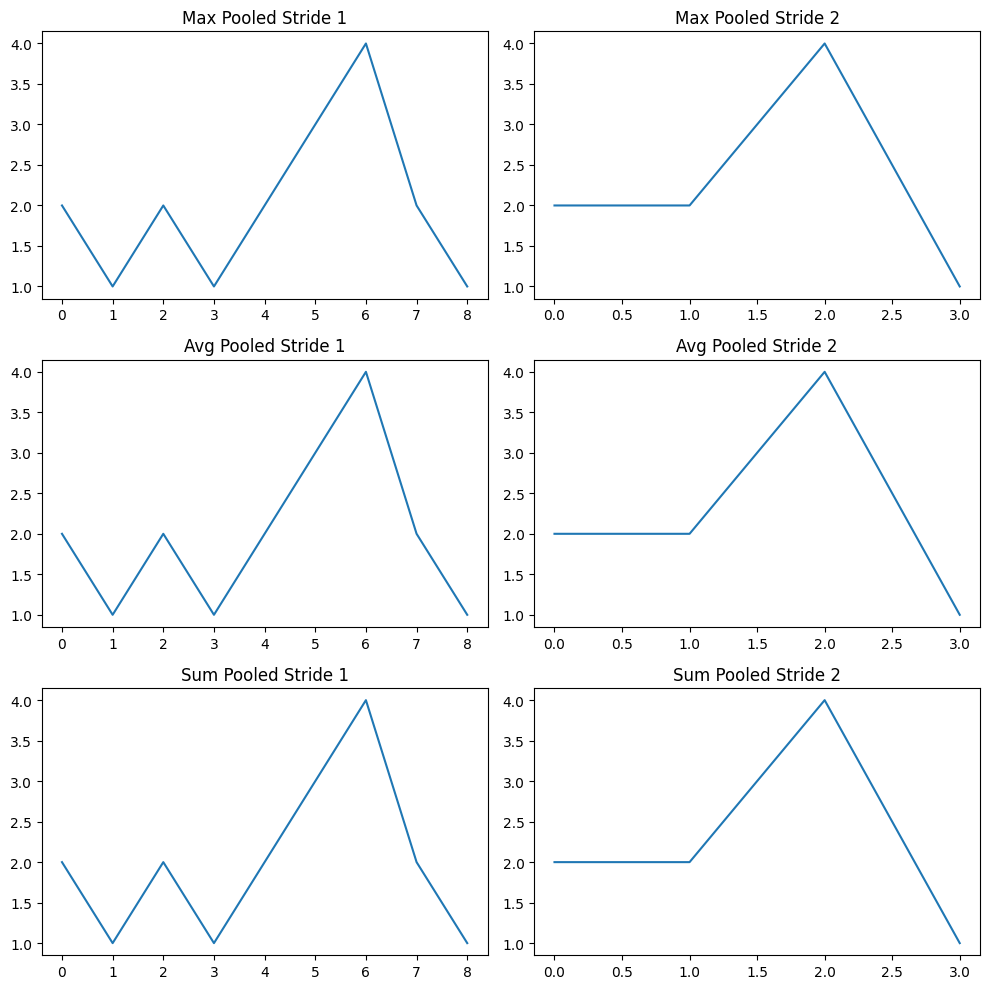

In [5]:
# Flatten the pooled feature maps
max_pooled_stride1_flat = max_pooled_stride1.flatten()
max_pooled_stride2_flat = max_pooled_stride2.flatten()
avg_pooled_stride1_flat = avg_pooled_stride1.flatten()
avg_pooled_stride2_flat = avg_pooled_stride2.flatten()
sum_pooled_stride1_flat = sum_pooled_stride1.flatten()
sum_pooled_stride2_flat = sum_pooled_stride2.flatten()

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Plot the flattened feature maps
axs[0, 0].plot(max_pooled_stride1_flat)
axs[0, 0].set_title('Max Pooled Stride 1')
axs[0, 1].plot(max_pooled_stride2_flat)
axs[0, 1].set_title('Max Pooled Stride 2')
axs[1, 0].plot(avg_pooled_stride1_flat)
axs[1, 0].set_title('Avg Pooled Stride 1')
axs[1, 1].plot(avg_pooled_stride2_flat)
axs[1, 1].set_title('Avg Pooled Stride 2')
axs[2, 0].plot(sum_pooled_stride1_flat)
axs[2, 0].set_title('Sum Pooled Stride 1')
axs[2, 1].plot(sum_pooled_stride2_flat)
axs[2, 1].set_title('Sum Pooled Stride 2')

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

In [6]:
# Define a simple model with a single layer
def model(x, w, b):
  return x * w + b

# Initialize weights and bias
w = np.random.rand(max_pooled_stride1_flat.shape[0])
b = 1

# Learning rate
learning_rate = 0.01

# Example target values
target = np.random.rand(max_pooled_stride1_flat.shape[0])

# Training loop for one epoch
for i in range(max_pooled_stride1_flat.shape[0]):
  # Calculate prediction
  prediction = model(max_pooled_stride1_flat[i], w[i], b)

  # Calculate error
  error = prediction - target[i]

  # Update weights and bias
  w[i] = w[i] - learning_rate * error * max_pooled_stride1_flat[i]
  b = b - learning_rate * error

print("Learned weights:", w)
print("Learned bias:", b)

Learned weights: [0.6139013  0.58874703 0.64535478 0.51695424 0.89173157 0.25755753
 0.23135445 0.88559006 0.55366278]
Learned bias: 0.8545607800774346
